# Abhiram Reddy Vintha

## Social Media Analytics for Business Intelligence
## Hult International Business School - Boston
## Prof. Sílvia Ariza Sentis



## Introduction

This report aims to analyze and provide insights based on the Twitter US Airline Sentiment dataset. The dataset contains tweets related to various US airlines and their corresponding sentiments. The goals of this report are to understand the sentiment distribution, explore negative reasons, and provide recommendations for improving customer satisfaction.

The dataset consists of tweets from six major US airlines: United, US Airways, American, Southwest, Delta, and Virgin America. The number of tweets varies among the airlines, with United having the highest number of tweets (3822) and Virgin America having the lowest (504). The sentiment of each tweet is categorized as negative, neutral, or positive. American Airlines has the highest number of negative tweets (1960), while Virgin America has the lowest (181). The sentiment confidence level across all airlines ranges from 0.82 to 0.93. The dataset also includes information on specific negative reasons mentioned in the tweets, such as customer service issues, flight cancellations, and late flights.


 **Twitter US Airline Sentiment**
https://www.kaggle.com/crowdflower/twitter-airline-sentiment

## Import libraries and Load the data

In [24]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
from collections import Counter
from wordcloud import WordCloud
from ast import literal_eval
from textblob import TextBlob
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd

airline_tweets = pd.read_csv("Tweets.csv")


## Basic Analysis of the Dataset

In [3]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
airline_tweets.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Number of Tweets per Airline Bar Graph

The main goal of this code snippet is to visualize the number of tweets per airline using a bar graph. The code counts the number of tweets for each unique airline in the 'airline' column of the `airline_tweets` DataFrame and creates a bar graph where each bar represents an airline and its height corresponds to the count of tweets. The graph aims to provide a clear visual comparison of tweet volumes among different airlines, allowing for easy identification of airlines with higher or lower tweet activity.

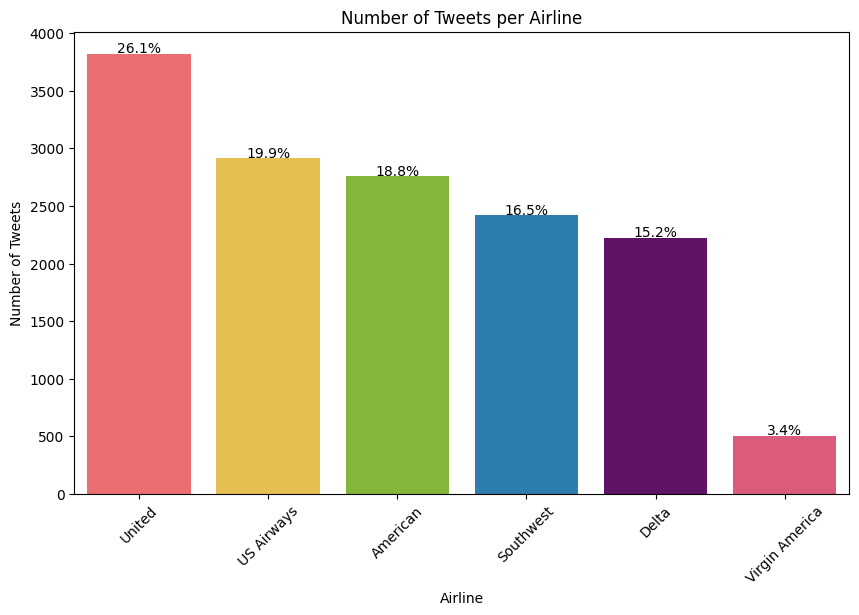

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count the number of tweets per airline
tweet_counts = airline_tweets['airline'].value_counts()

# Define a custom color palette
colors = ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4', '#6A0572', '#EF476F']  # Custom colors for each airline

# Create the colorful bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=tweet_counts.index, y=tweet_counts.values, palette=colors)

# Set the title, labels, and rotation of x-axis labels
plt.title('Number of Tweets per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)

# Add percentages above the bars
for i, count in enumerate(tweet_counts.values):
    percentage = count / tweet_counts.sum() * 100
    plt.text(i, count + 10, f'{percentage:.1f}%', ha='center')

# Show the graph
plt.show()


# Distribution of Sentiment Pie Chart

The main goal of this code snippet is to analyze the sentiment distribution in the 'airline_sentiment' column of the `airline_tweets` dataset. The code counts the occurrences of each sentiment category (negative, neutral, and positive) and generates a pie chart to visualize the distribution. The pie chart provides a clear visual representation of the proportion of tweets in each sentiment category, allowing for a quick understanding of the overall sentiment distribution in the dataset.

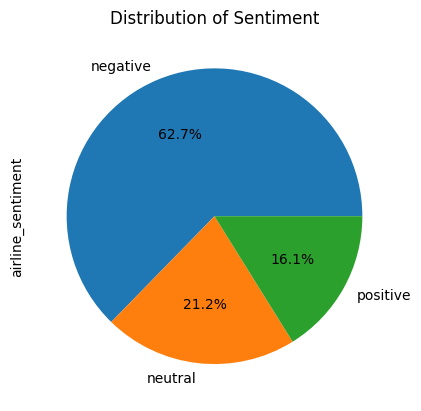

In [6]:
# Count the occurrences of each sentiment category in the 'airline_sentiment' column
sentiment_counts = airline_tweets['airline_sentiment'].value_counts()

# Create a pie chart to visualize the sentiment distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the title of the plot
plt.title('Distribution of Sentiment')

# Display the plot
plt.show()


# Number of Tweets per Day Line Plot

The main goal of this code snippet is to convert the 'tweet_created' column in the `airline_tweets` dataset to datetime format and plot the number of tweets per day. The code generates a line plot where the x-axis represents the timeline of dates, and the y-axis represents the count of tweets for each day. The plot allows for the visualization of trends, patterns, or any notable variations in tweet activity over time, providing insights into the frequency of tweets on a daily basis.

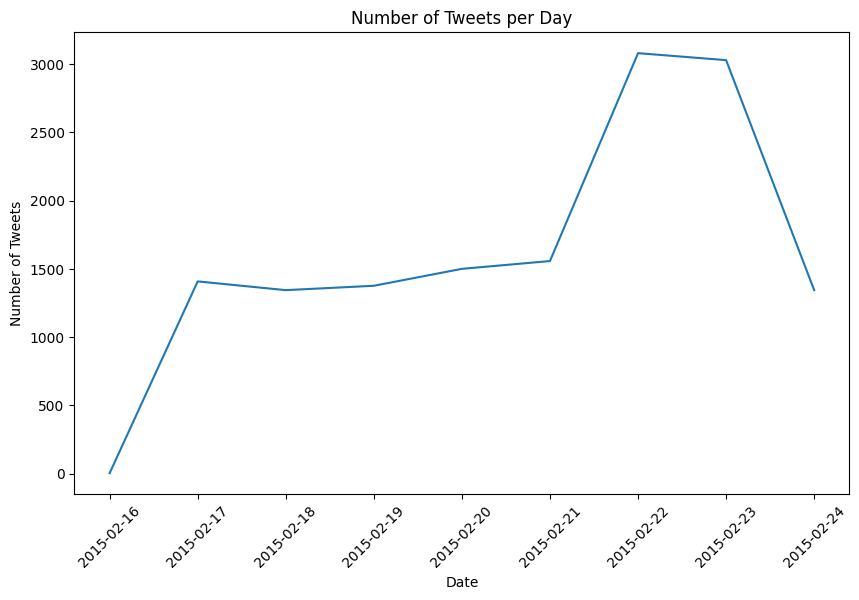

In [7]:

# Convert 'tweet_created' column to datetime
airline_tweets['tweet_created'] = pd.to_datetime(airline_tweets['tweet_created'])

# Plot the number of tweets per day
ax = airline_tweets['tweet_created'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 6))

# Set the title and labels
plt.title('Number of Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Top 20 User Locations by Tweet Frequency Bar Plot

The main goal of this code segment is to identify and visualize the top 20 user locations by tweet frequency in the `user_timezone` column of the `airline_tweets` dataset. The code generates a bar plot where each bar represents a specific location, and the height of the bar corresponds to the number of tweets associated with that location. This plot allows for a quick understanding of the distribution of tweet activity across different user locations and helps to identify the most active or frequently mentioned locations in the dataset.

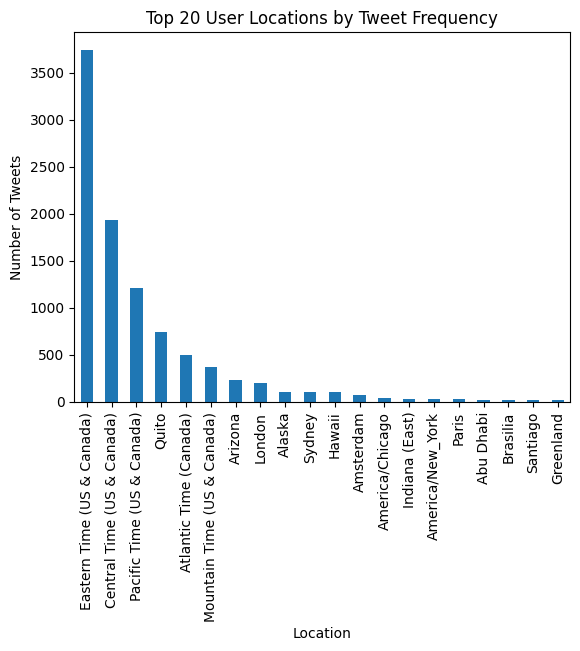

In [8]:
# Count the occurrences of each user timezone in the 'user_timezone' column
timezone_counts = airline_tweets['user_timezone'].value_counts()

# Create a bar plot to visualize the top 20 user locations by tweet frequency
timezone_counts.head(20).plot(kind='bar')

# Set the title of the plot
plt.title('Top 20 User Locations by Tweet Frequency')

# Set the label for the x-axis
plt.xlabel('Location')

# Set the label for the y-axis
plt.ylabel('Number of Tweets')

# Display the plot
plt.show()


# Number of Retweets Bar Plot

The goal of this code segment is to visualize the distribution of the number of retweets in the 'retweet_count' column of the `airline_tweets` dataset. The code creates a bar plot where each bar represents a specific count of retweets, allowing for a quick visual assessment of the frequency of different retweet counts. The plot helps to gain insights into the engagement and sharing patterns of tweets in the dataset.

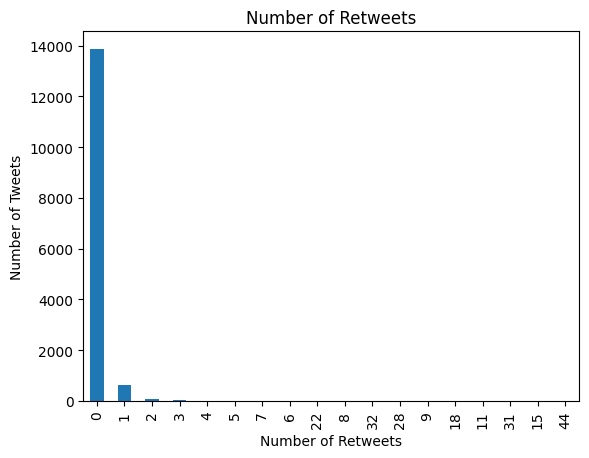

In [9]:
# Count the occurrences of each retweet count in the 'retweet_count' column
retweet_counts = airline_tweets['retweet_count'].value_counts()

# Create a bar plot to visualize the number of retweets
retweet_counts.plot(kind='bar')

# Set the title of the plot
plt.title('Number of Retweets')

# Set the label for the x-axis
plt.xlabel('Number of Retweets')

# Set the label for the y-axis
plt.ylabel('Number of Tweets')

# Display the plot
plt.show()


# Sentiment Distribution by Airline Grouped Bar Chart

The goal of this code segment is to visualize the sentiment distribution for each airline in the `airline_tweets` dataset. It creates a grouped bar chart where each bar represents the count of sentiments (negative, neutral, and positive) for a specific airline. The chart helps in comparing the sentiment distribution among different airlines and gaining insights into customer opinions and experiences.

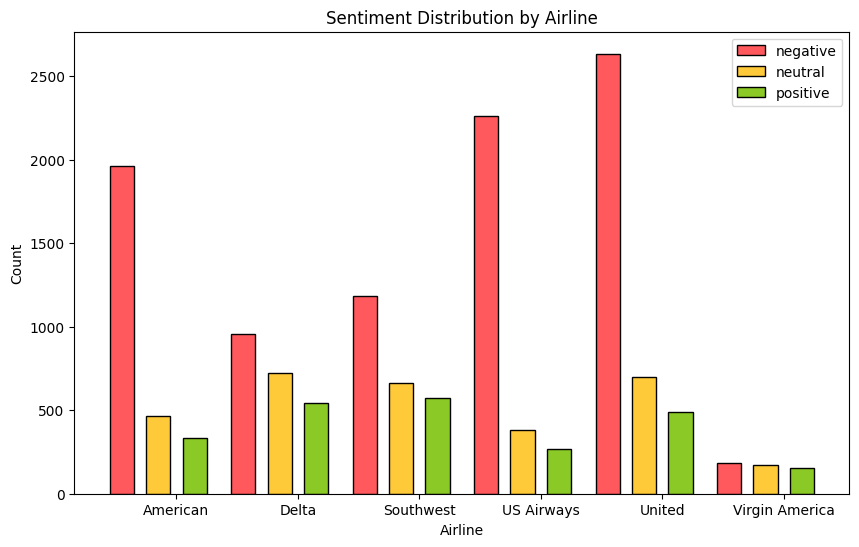

In [10]:

# Count the occurrences of each sentiment for each airline
sentiment_counts = airline_tweets.groupby(['airline', 'airline_sentiment']).size().unstack()

# Reset the index to make 'airline' a regular column
sentiment_counts = sentiment_counts.reset_index()

# Set the width and spacing between bars
bar_width = 0.2
spacing = 0.1

# Create a color palette for the sentiment categories
colors = ['#FF595E', '#FFCA3A', '#8AC926']  # Red, Yellow, Green

# Define the x-axis positions for each sentiment category
x = list(range(len(sentiment_counts)))

# Create the grouped bar chart with borders around each group
plt.figure(figsize=(10, 6))
for i, sentiment in enumerate(['negative', 'neutral', 'positive']):
    plt.bar([val + (bar_width + spacing) * i for val in x], sentiment_counts[sentiment], width=bar_width, color=colors[i], label=sentiment, edgecolor='black')

# Adjust the x-axis tick positions to align with the middle of each group
plt.xticks([val + (bar_width + spacing) * 1.5 for val in x], sentiment_counts['airline'])

# Set the x-axis labels and tick rotation
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Airline')
plt.legend()

# Show the chart
plt.show()


In [11]:
airline_tweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

## Visualizing Distribution of Negative Reasons by Airline

The goal of this code is to create a countplot that visualizes the distribution of negative reasons for different airlines. 'airline_tweets' with the necessary columns ('airline', 'negativereason'). The countplot is generated using the seaborn library and displayed using matplotlib. The plot provides insights into the frequency of negative reasons across different airlines, helping to analyze and understand customer sentiments.

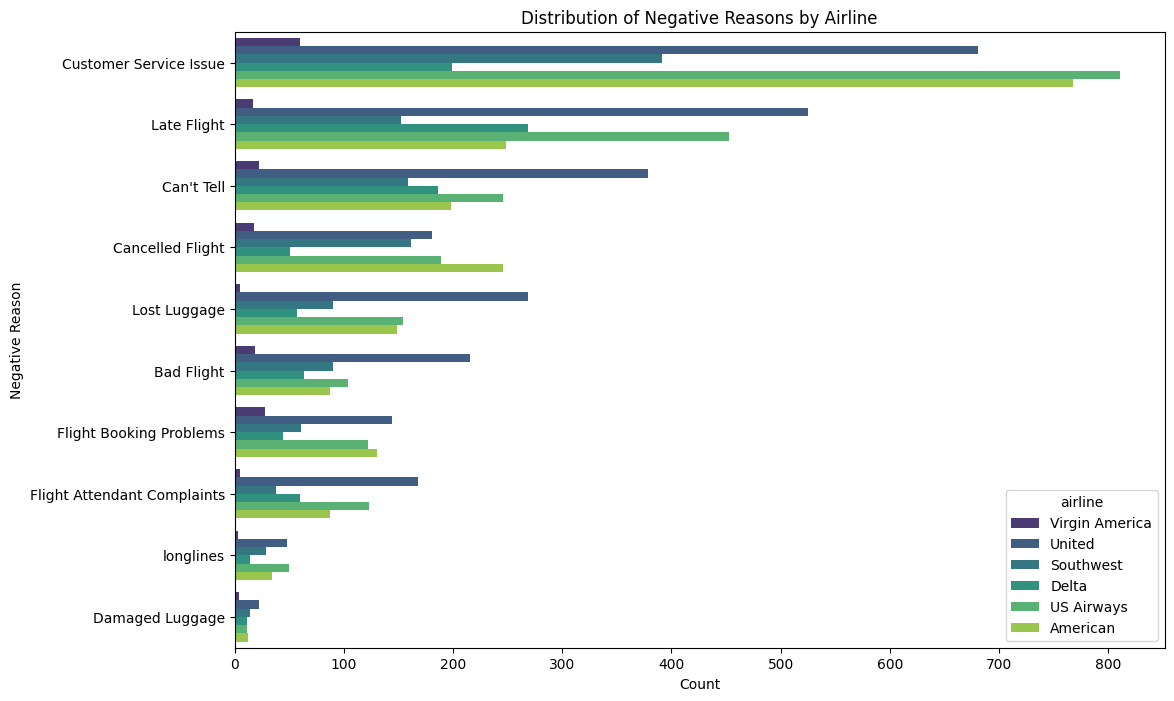

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a countplot for each airline
plt.figure(figsize=(12, 8))
sns.countplot(y='negativereason', data=airline_tweets, hue='airline', order=airline_tweets['negativereason'].value_counts().index, palette='viridis')

# Set the title and labels
plt.title('Distribution of Negative Reasons by Airline')
plt.xlabel('Count')
plt.ylabel('Negative Reason')

# Show the plot
plt.show()


## Text Preprocessing and Feature Extraction

The code snippet above performs text preprocessing and feature extraction for sentiment analysis on airline tweets.

### Text Preprocessing:
The `preprocess` function is defined to clean and preprocess each tweet. It converts the sentence to lowercase, removes HTML tags, URLs, numbers, and stopwords. It also tokenizes the text, applies stemming, and lemmatization techniques to reduce words to their base form. The processed text is stored in the 'processed_text' column of the 'airline_tweets' DataFrame.

### Splitting Data:
The data is split into training and validation sets using the `train_test_split` function. The 'processed_text' column is used as the input feature (`x_train` and `x_valid`), and the 'airline_sentiment' column is used as the target variable (`y_train` and `y_valid`). The split is done with a test size of 20% and a random state of 42.

### Feature Extraction:
The `TfidfVectorizer` from scikit-learn is used to convert the text data into numerical features. It tokenizes the text using the same tokenizer as in the preprocessing step and generates TF-IDF (Term Frequency-Inverse Document Frequency) vectors. The vectorizer is fit on the combined text data from the training and validation sets (`full_text`). The training and validation sets are then transformed into TF-IDF vectors using the fitted vectorizer (`train_vectorized` and `test_vectorized`, respectively).

In [13]:
# Text preprocessing
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

airline_tweets['processed_text'] = airline_tweets['text'].map(lambda s: preprocess(s))

# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(airline_tweets['processed_text'], airline_tweets['airline_sentiment'], test_size=0.2, random_state=42)

# Feature extraction
tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(x_train.values) + list(x_valid.values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(x_train)
test_vectorized = vectorizer.transform(x_valid)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Visualizing Distribution of Tweet Lengths

The code calculates the lengths of tweets in the 'text' column of the 'airline_tweets' DataFrame and creates a colorful histogram plot to visualize their distribution. The histogram plot shows the frequency of tweet lengths using 50 bins, with the x-axis representing tweet length and the y-axis representing frequency. Grid lines are added for better readability.

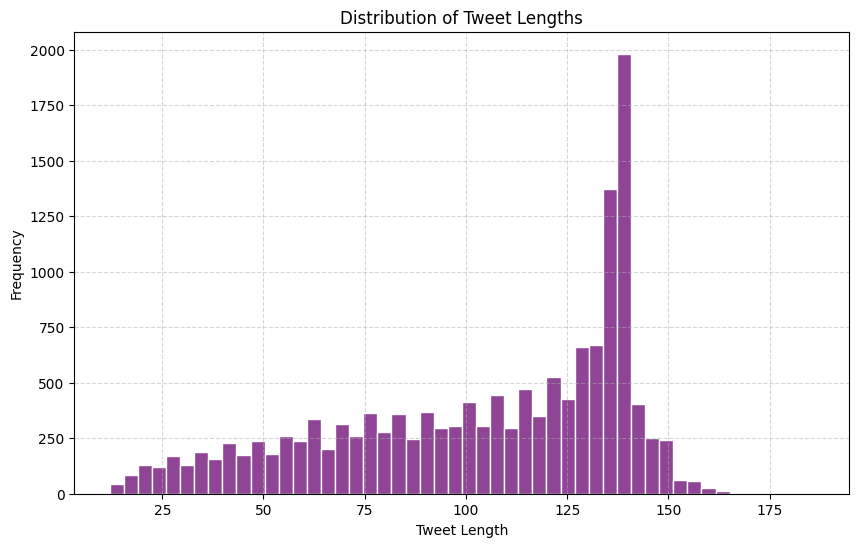

In [14]:

# Calculate the tweet lengths
airline_tweets['tweet_length'] = airline_tweets['text'].apply(len)

# Create a colorful histogram plot of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=airline_tweets, x='tweet_length', bins=50, color='#6A0572', edgecolor='white')

# Set the title and labels
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Visualizing Distribution of Tweet Lengths (Box Plot)

The code creates a box plot to visualize the distribution of tweet lengths in the 'tweet_length' column of the 'airline_tweets' DataFrame. The box plot displays the median, quartiles, and any outliers, providing insights into the range and spread of tweet lengths. The plot is titled 'Distribution of Tweet Lengths' and the y-axis represents the tweet length.

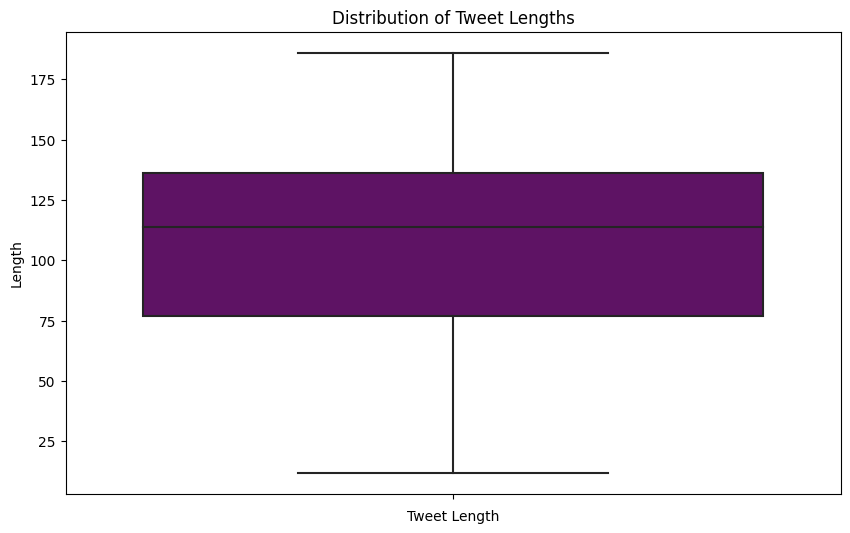

In [15]:
# Create a box plot of tweet lengths
plt.figure(figsize=(10, 6))
sns.boxplot(data=airline_tweets, y='tweet_length', color='#6A0572')

# Set the title and labels
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Length')

# Show the plot
plt.show()

## Visualizing Top 10 Most Common Words

The code snippet provided counts the frequencies of words in the 'processed_text' column of the 'airline_tweets' DataFrame. It then selects the top 10 most common words and visualizes them using a bar chart. The bar chart displays the words on the x-axis and their frequencies on the y-axis, allowing for a quick understanding of the most frequently occurring words. The plot is titled 'Top 10 most common words'.

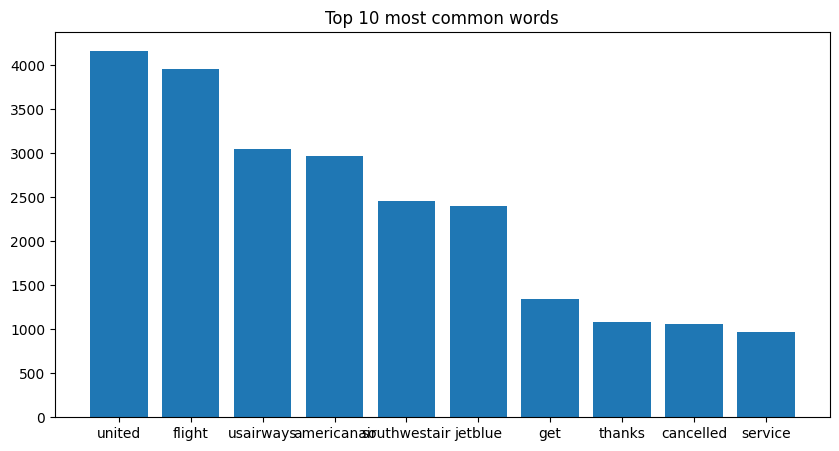

In [16]:

# Count frequencies
word_freq = Counter(" ".join(airline_tweets['processed_text']).split())

# Select top 10 most common words
top_words = word_freq.most_common(10)
words, freqs = zip(*top_words)

plt.figure(figsize=(10,5))
plt.bar(words, freqs)
plt.title('Top 10 most common words')
plt.show()

### Generating Word Cloud

The provided code generates a word cloud based on the frequencies of words in the 'processed_text' column of the 'airline_tweets' DataFrame. The word cloud visually represents the frequency of words, with more frequent words appearing larger and more prominent. The resulting word cloud is displayed using a figure with a size of 15x8. The axis is turned off to remove labels and ticks. The word cloud helps in gaining insights into the most commonly occurring words in the processed text data.

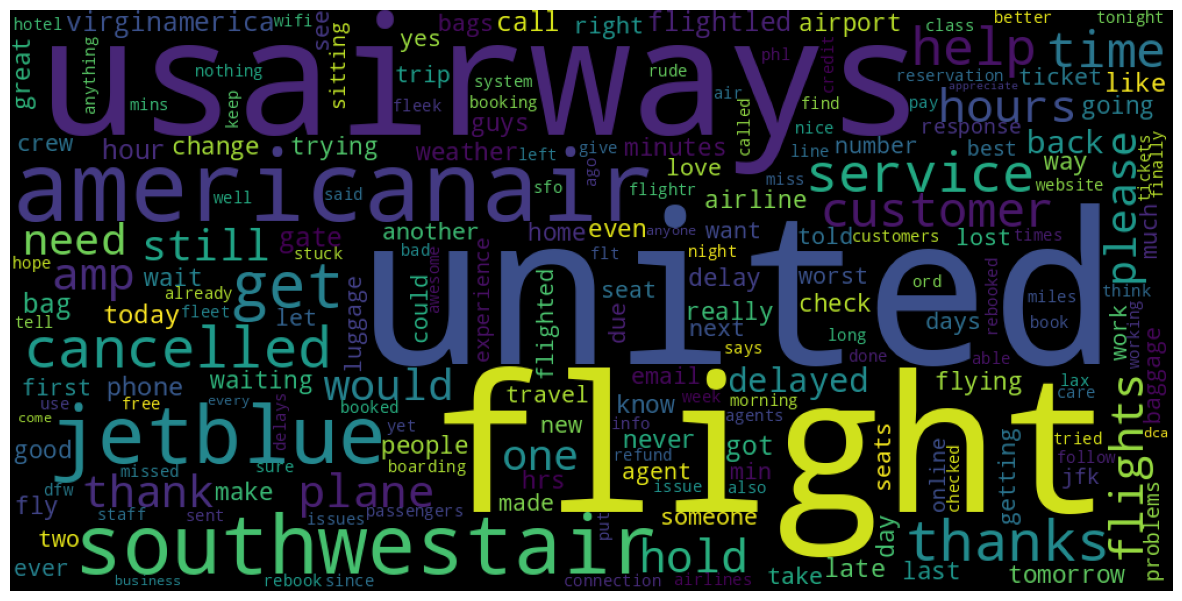

In [17]:

# Generate word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_freq)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [18]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Part of Speech Table

The provided code generates a table using the tabulate library to display the meanings of different parts of speech. The table includes two columns: "Part of Speech" and "Meaning". Each row corresponds to a specific part of speech abbreviation and its corresponding meaning. The table is printed using the "grid" table format, providing a clear and organized reference for understanding the meanings of different parts of speech.

In [19]:
from tabulate import tabulate

# Define the data for the table
data = [
    ["NN", "Noun, singular or mass"],
    ["JJ", "Adjective"],
    ["NNS", "Noun, plural"],
    ["VBD", "Verb, past tense"],
    ["RB", "Adverb"],
    ["VBP", "Verb, non-3rd person singular present"],
    ["VBG", "Verb, gerund or present participle"],
    ["VB", "Verb, base form"],
    ["VBN", "Verb, past participle"],
    ["IN", "Preposition or subordinating conjunction"],
    ["VBZ", "Verb, 3rd person singular present"],
    ["MD", "Modal"],
    ["CD", "Cardinal number"],
    ["JJS", "Adjective, superlative"],
    ["DT", "Determiner"],
    ["JJR", "Adjective, comparative"],
    ["RBR", "Adverb, comparative"],
    ["RP", "Particle"],
    ["FW", "Foreign word"],
    ["CC", "Coordinating conjunction"],
    ["NNP", "Proper noun, singular"],
    ["UH", "Interjection"],
    ["TO", "to"],
    ["RBS", "Adverb, superlative"],
    ["WP", "Wh-pronoun"],
    ["WDT", "Wh-determiner"],
    ["WRB", "Wh-adverb"],
    ["PRP", "Personal pronoun"],
    ["WP$", "Possessive wh-pronoun"],
    ["PDT", "Predeterminer"],
    ["PRP$", "Possessive pronoun"],
    ["POS", "Possessive ending"]
]

# Print the table
print(tabulate(data, headers=["Part of Speech", "Meaning"], tablefmt="grid"))


+------------------+------------------------------------------+
| Part of Speech   | Meaning                                  |
+==================+==========================================+
| NN               | Noun, singular or mass                   |
+------------------+------------------------------------------+
| JJ               | Adjective                                |
+------------------+------------------------------------------+
| NNS              | Noun, plural                             |
+------------------+------------------------------------------+
| VBD              | Verb, past tense                         |
+------------------+------------------------------------------+
| RB               | Adverb                                   |
+------------------+------------------------------------------+
| VBP              | Verb, non-3rd person singular present    |
+------------------+------------------------------------------+
| VBG              | Verb, gerund or pre

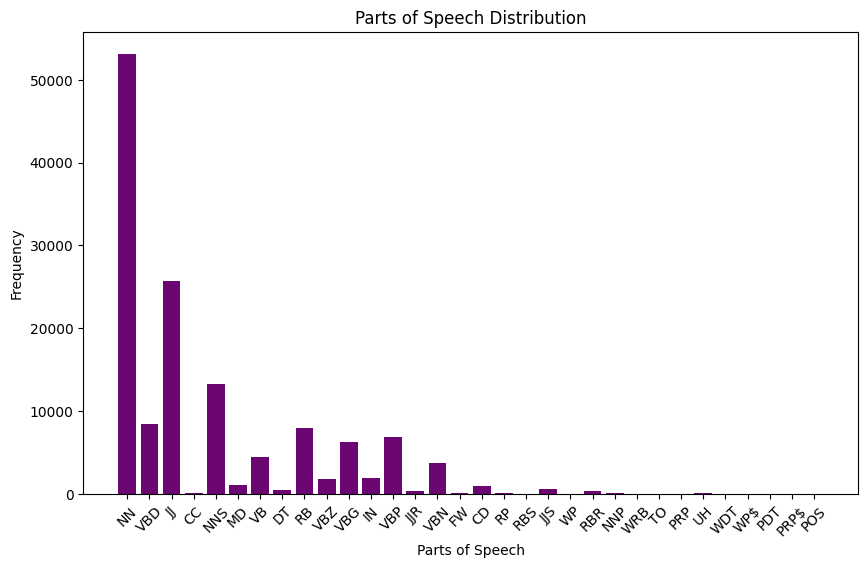

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter


# Tag parts of speech (POS)
tagged = pos_tag(word_tokenize(" ".join(airline_tweets['processed_text'])))

# Count frequencies
tag_freq = Counter(tag for word, tag in tagged)

# Create a bar chart of parts of speech distribution
plt.figure(figsize=(10, 6))
plt.bar(tag_freq.keys(), tag_freq.values(), color='#6A0572')

# Set the title and labels
plt.title('Parts of Speech Distribution')
plt.xlabel('Parts of Speech')
plt.ylabel('Frequency')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [21]:
# Tag parts of speech (POS)
tagged = pos_tag(word_tokenize(" ".join(airline_tweets['processed_text'])))

# Count frequencies
tag_freq = Counter(tag for word, tag in tagged)

# Create a DataFrame from the tag frequencies
tag_freq_df = pd.DataFrame.from_dict(tag_freq, orient='index', columns=['Frequency'])
tag_freq_df.index.name = 'Part of Speech'

# Sort the DataFrame by frequency in descending order
tag_freq_df = tag_freq_df.sort_values(by='Frequency', ascending=False)

# Display the table
print(tag_freq_df)

                Frequency
Part of Speech           
NN                  53114
JJ                  25753
NNS                 13289
VBD                  8401
RB                   7970
VBP                  6845
VBG                  6207
VB                   4424
VBN                  3724
IN                   1913
VBZ                  1787
MD                   1099
CD                   1006
JJS                   555
DT                    418
JJR                   366
RBR                   324
RP                    140
FW                    108
CC                    106
NNP                    55
UH                     53
TO                     41
RBS                    35
WP                     34
WDT                    30
WRB                    23
PRP                    15
WP$                    12
PDT                     4
PRP$                    3
POS                     1


## Document Term Matrix Heatmap:

    
  
  This visualization represents the frequency of terms that occur in the collection of documents. Rows represent documents whereas columns correspond to terms. Higher frequency counts are colored darker.



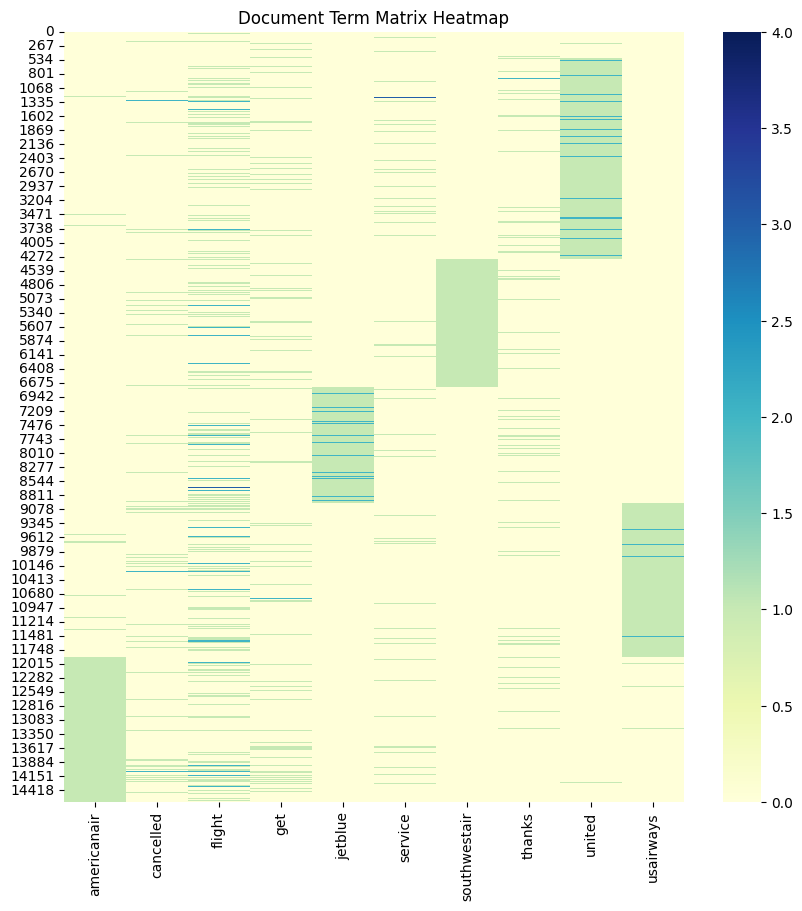

In [25]:

vectorizer = CountVectorizer(max_features=10) # only top 10 words
data_vectorized = vectorizer.fit_transform(airline_tweets['processed_text'])

# Convert to array and label columns
doc_term_matrix = data_vectorized.toarray()
df = pd.DataFrame(doc_term_matrix, columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(10,10))
sns.heatmap(df, cmap="YlGnBu")
plt.title('Document Term Matrix Heatmap')
plt.show()



# Insights

Upon analyzing the dataset, several key insights have been uncovered. First, the sentiment distribution among the airlines shows that negative sentiments are the most prevalent. This indicates that there are areas for improvement in terms of customer satisfaction and addressing customer concerns. United Airlines has the highest number of negative tweets (2633), followed by US Airways (2263) and American Airlines (1960). Delta Airlines, Southwest Airlines, and Virgin America have relatively lower numbers of negative tweets.

Among the negative reasons mentioned in the tweets, customer service issues are the most common across all airlines. This highlights the importance of focusing on enhancing customer service quality and responsiveness. Flight cancellations, late flights, and lost luggage are other significant negative reasons that need attention. By addressing these issues, airlines can improve customer experience and loyalty.

# Recommendations

Based on the insights derived from the analysis, the following recommendations are proposed to improve customer satisfaction and overall airline performance:

1. Enhance Customer Service: Airlines should prioritize customer service training and empower their staff to handle customer concerns effectively. Prompt and empathetic responses to customer queries and complaints can significantly improve overall satisfaction.

2. Improve Operational Efficiency: Addressing issues related to flight cancellations, delays, and lost luggage is crucial. Airlines should invest in operational improvements to minimize these inconveniences for passengers.

3. Utilize Social Listening: Airlines should actively monitor social media platforms to identify and address customer complaints and negative sentiments in real-time. By promptly responding to customer feedback, airlines can demonstrate their commitment to customer satisfaction.

4. Enhance Communication: Providing timely and accurate information to customers regarding flight updates, changes, and any disruptions can help manage expectations and reduce frustrations.

5. Personalize Customer Experiences: Airlines should explore ways to personalize interactions and experiences for their customers. Tailored offers, loyalty programs, and personalized services can create a positive impression and strengthen customer relationships.

6. Continuous Improvement: Airlines should regularly assess customer feedback, sentiments, and negative reasons to identify recurring issues and prioritize improvement initiatives. By continuously monitoring and enhancing their services, airlines can adapt to evolving customer expectations.

# Conclusion

In conclusion, this report highlights the sentiment distribution, negative reasons, and recommendations for improving customer satisfaction based on the Twitter US Airline Sentiment dataset. The analysis revealed that negative sentiments are prominent, indicating areas of improvement in customer service and operational efficiency. By addressing customer concerns, enhancing communication, and personalizing experiences, airlines can strive for higher customer satisfaction and loyalty. Continuous monitoring, analysis, and improvement are essential to meet changing customer expectations and remain competitive in the airline industry.